# **Imports**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading The Data And Showing Some Info**

In [ ]:
# Read Players dataset
players_path = 'players.csv'
players = pd.read_csv(players_path)

# Display information about Players dataset
print(players.head())

   player_id first_name     last_name                name  last_season  \
0         10   Miroslav         Klose      Miroslav Klose         2015   
1         26      Roman  Weidenfeller  Roman Weidenfeller         2017   
2         65    Dimitar      Berbatov    Dimitar Berbatov         2015   
3         77        NaN         Lúcio               Lúcio         2012   
4         80        Tom        Starke          Tom Starke         2017   

   current_club_id         player_code    country_of_birth city_of_birth  \
0              398      miroslav-klose              Poland         Opole   
1               16  roman-weidenfeller             Germany          Diez   
2             1091    dimitar-berbatov            Bulgaria   Blagoevgrad   
3              506               lucio              Brazil      Brasília   
4               27          tom-starke  East Germany (GDR)       Freital   

  country_of_citizenship  ...   foot height_in_cm contract_expiration_date  \
0                Ger

In [ ]:
print("Shape:", players.shape)

Shape: (30328, 23)


In [ ]:
print("Columns:", players.columns)

Columns: Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')


In [ ]:
games_path = 'games.csv'
# Read Games dataset
games = pd.read_csv(games_path)

# Display information about Games dataset
print(games.head())

   game_id competition_id  season         round        date  home_club_id  \
0  2222597            RU1    2012   6. Matchday  2012-08-25          3725   
1  2222627            RU1    2012   5. Matchday  2012-08-20          2696   
2  2222658            RU1    2012  10. Matchday  2012-09-30          2410   
3  2222664            RU1    2012   8. Matchday  2012-09-15           932   
4  2222683            RU1    2012  12. Matchday  2012-10-22          2696   

   away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
0           232              2.0              1.0                 2.0  ...   
1          4128              0.0              2.0                11.0  ...   
2           121              0.0              2.0                 2.0  ...   
3          2698              1.0              0.0                 5.0  ...   
4         12438              0.0              1.0                11.0  ...   

        stadium attendance               referee  \
0  Akhmat-Arena 

<ipython-input-8-ca4561e9a44c>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv(games_path)


In [ ]:
print("\nShape:", games.shape)


Shape: (65565, 23)


In [ ]:
print("\nShape:", games.shape)
print("\nColumns:", games.columns)


Shape: (65565, 23)

Columns: Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')


# **Now, Lets Integrate Both Datasets**

In [ ]:
# We will integrate (inner join) the two tables on the club_id column
# The games dataset has two club id columns, the "home" and the "away"
#     -> In this pipeline, we will focus on the home club ids (home players)
merged_data = pd.merge(players, games, left_on='current_club_id', right_on='home_club_id', how='inner')

# Display information about the merged dataset
print(merged_data.head())

   player_id first_name last_name            name  last_season  \
0         10   Miroslav     Klose  Miroslav Klose         2015   
1         10   Miroslav     Klose  Miroslav Klose         2015   
2         10   Miroslav     Klose  Miroslav Klose         2015   
3         10   Miroslav     Klose  Miroslav Klose         2015   
4         10   Miroslav     Klose  Miroslav Klose         2015   

   current_club_id     player_code country_of_birth city_of_birth  \
0              398  miroslav-klose           Poland         Opole   
1              398  miroslav-klose           Poland         Opole   
2              398  miroslav-klose           Poland         Opole   
3              398  miroslav-klose           Poland         Opole   
4              398  miroslav-klose           Poland         Opole   

  country_of_citizenship  ...           stadium attendance  \
0                Germany  ...  Olimpico di Roma    38594.0   
1                Germany  ...  Olimpico di Roma    32569.0   
2 

In [ ]:
print("\nShape:", merged_data.shape)
print("\nColumns:", merged_data.columns)


Shape: (4592238, 46)

Columns: Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url_x', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'game_id', 'competition_id', 'season',
       'round', 'date', 'home_club_id', 'away_club_id', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'url_y', 'home_club_formation',
       'away_club_formation', 'home_club_name', 'away_club_name', 'aggregate',
       'competition_type'],
      dtype='object')


# **Lets take a small sample of the dataset because it's too large**

In [ ]:
# Specify the desired sample size
sample_size = 500000

# Take a random sample
random_sample = merged_data.sample(n=sample_size, random_state=42)
# save the original data for future use
original_sample = random_sample

print("\nShape:", random_sample.shape)


Shape: (500000, 46)


# **Lets Clean The Data A Bit (Some Data Preprocessing)**

In [ ]:
# Columns to drop
# Drop the "firstname" and "lastname" columns as we already have a "name" (full name) column.
# We will also drop the "name" column as we have the "player code" column which is a cleaner column.
# Rest are Irrelevant Columns...

columns_to_drop = ['first_name', 'last_name', 'name', 'contract_expiration_date', 'agent_name', 'image_url', 'url_x', 'url_y', 'date']

# Drop columns only if they exist
for column in columns_to_drop:
    if column in random_sample.columns:
        random_sample = random_sample.drop(column, axis=1)

# Display information about the updated dataset
print("\nShape:", random_sample.shape)
print("\nColumns:", random_sample.columns)

# save the original data for future use
original_sample = random_sample


Shape: (500000, 37)

Columns: Index(['player_id', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'city_of_birth', 'country_of_citizenship',
       'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur', 'game_id',
       'competition_id', 'season', 'round', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')


# **Research Question 1**

## **Relationship between Player Market Value and Goal Contribution**

Research Question: Is there a correlation between a player's market value and their contribution to goals in matches? We will analyze this by examining the market value of players who scored goals in matches. This research question aims to understand if higher-valued players are more likely to be key goal contributors in football matches.

The hypotheses is that, yes, higher-valued players do score more goals.

In [ ]:
# Check how many null values we have in the 'price' column
missing_values = random_sample['market_value_in_eur'].isnull().sum()
missing_values

# We see that we do have some null values
# Lets remove them

17638

In [ ]:
# Drop all rows with nulls in this column
random_sample = random_sample.dropna(subset=['market_value_in_eur'])

In [ ]:
# Check how many null values we have in the 'price' column
missing_values = random_sample['market_value_in_eur'].isnull().sum()
missing_values

# We successfully removed all of them.

0

In [ ]:
# Check how many non-numeric values we have in that column
numeric_column = pd.to_numeric(random_sample['market_value_in_eur'], errors='coerce')
non_numeric_count = numeric_column.isnull().sum()
print(non_numeric_count)

# They are all numeric, hence they are valid!

0


In [ ]:
# Check if there are any rows with 'market_value_in_eur' equal to 0
zero_values = random_sample[random_sample['market_value_in_eur'] == 0]
print("Rows with 'market_value_in_eur' equal to 0:")
print(zero_values)

Rows with 'market_value_in_eur' equal to 0:
Empty DataFrame
Columns: [player_id, last_season, current_club_id, player_code, country_of_birth, city_of_birth, country_of_citizenship, date_of_birth, sub_position, position, foot, height_in_cm, current_club_domestic_competition_id, current_club_name, market_value_in_eur, highest_market_value_in_eur, game_id, competition_id, season, round, home_club_id, away_club_id, home_club_goals, away_club_goals, home_club_position, away_club_position, home_club_manager_name, away_club_manager_name, stadium, attendance, referee, home_club_formation, away_club_formation, home_club_name, away_club_name, aggregate, competition_type]
Index: []

[0 rows x 37 columns]


In [ ]:
# save the original data for future use
original_sample = random_sample

In [ ]:
# Get the minimum and maximum values in the 'market_value_in_eur' column
min_price = random_sample['market_value_in_eur'].min()
max_price = random_sample['market_value_in_eur'].max()

print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

Minimum Price: 10000.0
Maximum Price: 180000000.0


In [ ]:
# Check how many null values we have in the 'goals' column
missing_values = random_sample['home_club_goals'].isnull().sum()
missing_values

# We see that we do not have any null values

0

In [ ]:
# Check how many non-numeric values we have in that column
numeric_column = pd.to_numeric(random_sample['home_club_goals'], errors='coerce')
non_numeric_count = numeric_column.isnull().sum()
print(non_numeric_count)

# They are all numeric, hence they are valid!

0


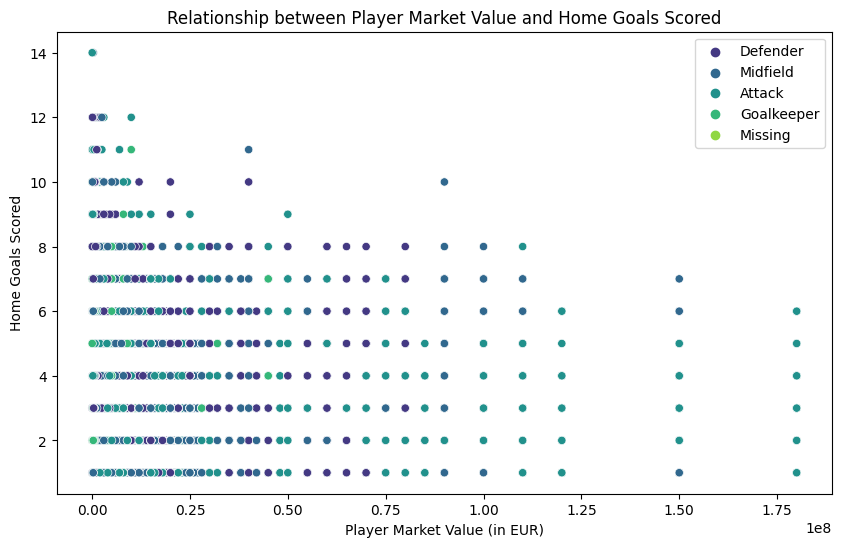

In [ ]:
# Scatter plot to visualize the relationship between player market value and home goals scored
goal_scorers = random_sample[random_sample['home_club_goals'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_value_in_eur', y='home_club_goals', data=goal_scorers, hue='position', palette='viridis')
plt.title('Relationship between Player Market Value and Home Goals Scored')
plt.xlabel('Player Market Value (in EUR)')
plt.ylabel('Home Goals Scored')
plt.legend()
plt.show()

# We see that the players with the lowest values have the highest goals,
# while the players with the highest values have the lowest goals.
# This didnt make much sense logically, so we will check the results mathematically from the dataset itself.

In [ ]:
# We will check the average price of, both, players that score the most goals,
# and that score the least goals.

# Define goal count thresholds
# We selected that threshold from the above plot.
low_goal_threshold = 0
high_goal_threshold = 6

# Create masks for players with goals from 7 to 20 and from 0 to 6
high_goal_players = (random_sample['home_club_goals'] >= 7) & (random_sample['home_club_goals'] <= 20)
low_goal_players = (random_sample['home_club_goals'] >= low_goal_threshold) & (random_sample['home_club_goals'] <= high_goal_threshold)

# Calculate the average price for both player sets
average_price_high_goals = random_sample[high_goal_players]['market_value_in_eur'].mean()
average_price_low_goals = random_sample[low_goal_players]['market_value_in_eur'].mean()

# Display the results
print("Average Price for Players with Goals from 7 to 20:", average_price_high_goals)
print("Average Price for Players with Goals from 0 to 6:", average_price_low_goals)

# We see that, in fact, the players with most goals do have the highest values,
# which now makes sense logically too.
# But this contradicts the above plot.
# So we will try the same approach but with a tweak.


Average Price for Players with Goals from 7 to 20: 5260995.3550099535
Average Price for Players with Goals from 0 to 6: 2247624.8245313037


In [ ]:
# We will check the average price of, both, players that score the most goals,
# and that score the least goals.
# BUT THIS TIME:
#     -> for the calculation of the average price of the players
#        with the least goals,
#        we will not take the players with the highest goals into account.
#        The thought behind this is, that these players, will skew the the average.

# Define goal count thresholds
# We selected that threshold from the above plot.
low_goal_threshold = 0
high_goal_threshold = 6
high_goal_threshold_upper = 20

# Create masks for players with goals from 7 to 20 and from 0 to 6
high_goal_players = (random_sample['home_club_goals'] >= high_goal_threshold) & (random_sample['home_club_goals'] <= high_goal_threshold_upper)
low_goal_players = (random_sample['home_club_goals'] >= low_goal_threshold) & (random_sample['home_club_goals'] <= high_goal_threshold)

# Exclude players with goals from 7 to 20 for the low_goal_players set
low_goal_players = low_goal_players & ~high_goal_players

# Calculate the average price for both player sets
average_price_high_goals = random_sample[high_goal_players]['market_value_in_eur'].mean()
average_price_low_goals = random_sample[low_goal_players]['market_value_in_eur'].mean()

# Display the results
print("Average Price for Players with Goals from 7 to 20:", average_price_high_goals)
print("Average Price for Players with Goals from 0 to 6 (excluding 7 to 20):", average_price_low_goals)

# We see that the prices are still the same.
# So logically, the high valued players score more goals than low valued players.

Average Price for Players with Goals from 7 to 20: 4908358.974358974
Average Price for Players with Goals from 0 to 6 (excluding 7 to 20): 2227780.608555493


In [ ]:
# We simply get some more data to reassure the conclusion.

# Find the player with the highest goals
max_goals_player = random_sample.loc[random_sample['home_club_goals'].idxmax()]

# Find the player with the lowest goals
min_goals_player = random_sample.loc[random_sample['home_club_goals'].idxmin()]

# Display the results
print("Player with the Highest Goals:")
print(max_goals_player[['player_code', 'home_club_goals', 'market_value_in_eur']])

print("\nPlayer with the Lowest Goals:")
print(min_goals_player[['player_code', 'home_club_goals', 'market_value_in_eur']])

# We see that the player with the highest goals does in fact have a higher price.

# Why the plot showed contradicting data?

Player with the Highest Goals:
player_code            fausto-rossi
home_club_goals                14.0
market_value_in_eur        300000.0
Name: 4067612, dtype: object

Player with the Lowest Goals:
player_code            patrik-raitanen
home_club_goals                    0.0
market_value_in_eur            50000.0
Name: 4507746, dtype: object


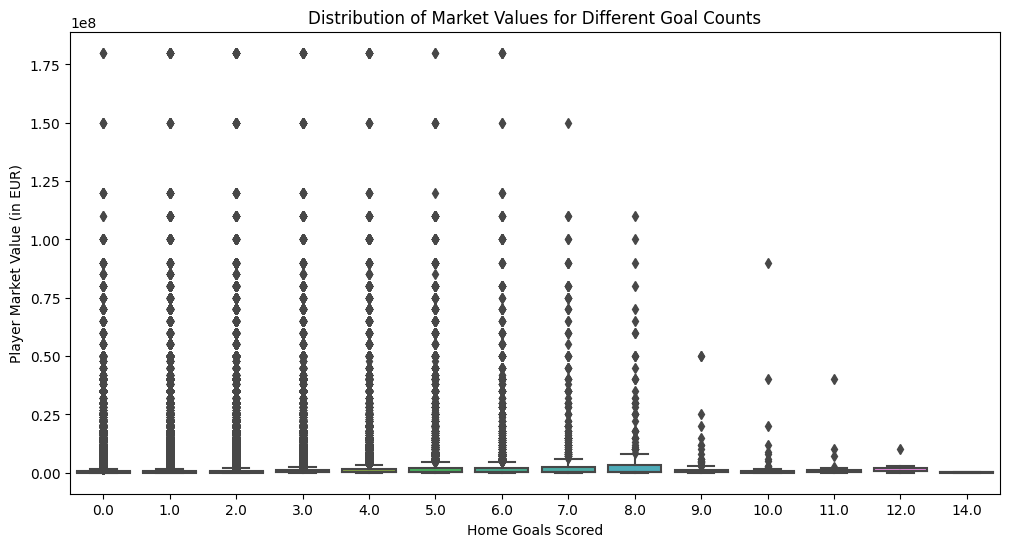

In [ ]:
# Trying a different plot.

plt.figure(figsize=(12, 6))
sns.boxplot(x='home_club_goals', y='market_value_in_eur', data=random_sample)
plt.title('Distribution of Market Values for Different Goal Counts')
plt.xlabel('Home Goals Scored')
plt.ylabel('Player Market Value (in EUR)')
plt.show()

# And again, the plot showed the oppositie of the information that we got from the
# average calculations.

<ipython-input-29-03df6d745e23>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=random_sample, x='home_club_goals',  bins=20, multiple="stack", palette='viridis')


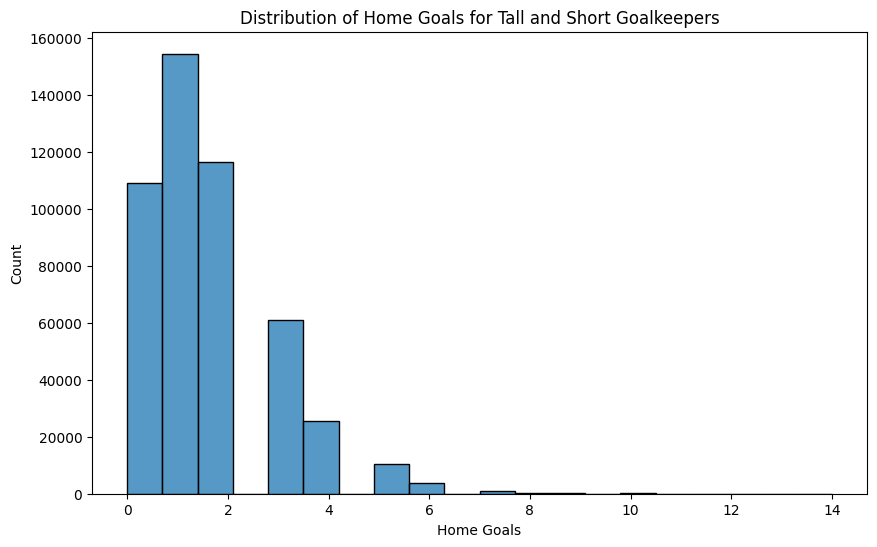

In [ ]:
# Create a histogram for home goals with the player value
plt.figure(figsize=(10, 6))
sns.histplot(data=random_sample, x='home_club_goals',  bins=20, multiple="stack", palette='viridis')
plt.title('Distribution of Home Goals for Tall and Short Goalkeepers')
plt.xlabel('Home Goals')
plt.ylabel('Count')
plt.show()

# And again, the plot showed the oppositie of the information that we got from the
# average calculations.

# **Research Question 1 Answer**

In Conclusion, it is unclear if the answer is yes or no.
Based on the plots, the players with a higher value do not have higher goals.
But based on the average calculations, the players with a higher value do have higher goals.

One cannot even come to the conclusion that there is no clear relationship, as there is! but the relationshio is contradicting!

# **Research Question 2**

## **Relationship between GoalKeeper Height and goal defense (better game performance -> winning the game)**

Is there a correlation between the height of goalkeepers and the number of away goals defended, suggesting that taller goalkeepers might contribute to better defensive performance and finally, winning the game?

1) We will firstly classify all goal keepers as either tall or short based on a threshold from known knwoledge acorss the web.

2) then we will see if there is a relationship between the height of goalkeepers, if they have been classified as tall or short, and their defended goals.

3) After that, we will classify a new column called game won, and we will see if the tall keepers truly did lead to a better game performance, and hence, winning the game.

In [ ]:
# re-initialize the random_sample
random_sample = original_sample

In [ ]:
# Check how many null values we have in the 'position' column
missing_values = random_sample['position'].isnull().sum()
missing_values

# We see that we do not have any null values

0

In [ ]:
# Check how many null values we have in the 'height' column
missing_values = random_sample['height_in_cm'].isnull().sum()
missing_values

# We see that we do have some null values

27639

In [ ]:
# Drop all rows with nulls in this column
random_sample = random_sample.dropna(subset=['height_in_cm'])

In [ ]:
# Check how many null values we have in the 'height' column
missing_values = random_sample['height_in_cm'].isnull().sum()
missing_values

# We successfully removed all null values

0

In [ ]:
# Filter random_sample dataset for goalkeepers
goalkeepers = random_sample[random_sample['position'] == 'Goalkeeper']

# Research on the web shows that the average height of a goal keeper,
# is around 190 cm
goalkeeper_height_threshold = 190

# Add a new column 'is_tall_goalkeeper' based on the mean height threshold to the original random_sample DataFrame
random_sample['is_tall_goalkeeper'] = random_sample['height_in_cm'] >= goalkeeper_height_threshold

# Count the number of tall and short goalkeepers
num_tall_goalkeepers = random_sample['is_tall_goalkeeper'].sum()
num_short_goalkeepers = len(random_sample) - num_tall_goalkeepers

# Display the mean goalkeeper height and the results
print("Mean Goalkeeper Height:", goalkeeper_height_threshold)
print("Number of Tall Goalkeepers:", num_tall_goalkeepers)
print("Number of Short Goalkeepers:", num_short_goalkeepers)

Mean Goalkeeper Height: 190
Number of Tall Goalkeepers: 68140
Number of Short Goalkeepers: 386583


<ipython-input-35-7d1881ce117e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_sample['is_tall_goalkeeper'] = random_sample['height_in_cm'] >= goalkeeper_height_threshold


In [ ]:
# Filter random_sample dataset for goalkeepers
goalkeeper_rows = random_sample[random_sample['position'] == 'Goalkeeper']

# Specify the columns you want to display
columns_to_display = ['player_code', 'position', 'is_tall_goalkeeper', 'height_in_cm']

# Display a random sample of rows for the specified columns for goalkeepers
random_goalkeeper_rows = goalkeeper_rows.loc[:, columns_to_display].sample(n=5)
print(random_goalkeeper_rows)


               player_code    position  is_tall_goalkeeper  height_in_cm
2046314           georgemy  Goalkeeper                True         197.0
924127          danny-ward  Goalkeeper                True         191.0
1474784       fabio-duarte  Goalkeeper               False         187.0
3410530  dmytro-bezotosnyi  Goalkeeper                True         192.0
2361875      jordy-deckers  Goalkeeper                True         190.0


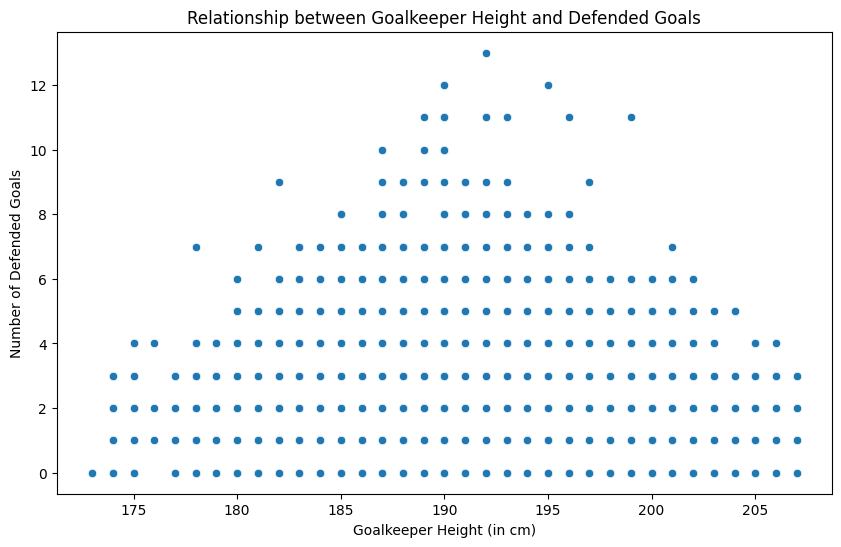

In [ ]:
# Scatter plot to visualize the relationship between goalkeeper height and defended goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_in_cm', y='away_club_goals', data=goalkeeper_rows)
plt.title('Relationship between Goalkeeper Height and Defended Goals')
plt.xlabel('Goalkeeper Height (in cm)')
plt.ylabel('Number of Defended Goals')
plt.show()

# We see that there is no clear or necessarily skewed relationship for variables in our research question.

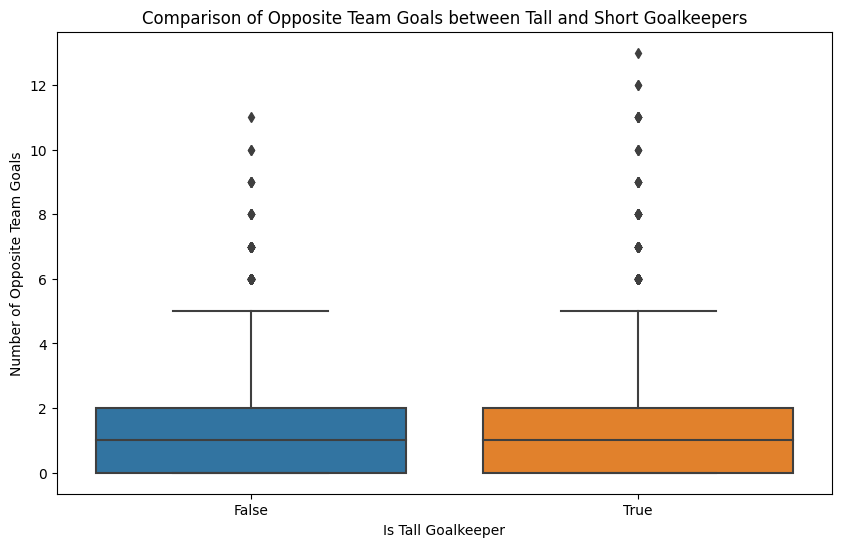

In [ ]:
# Box plot to compare defended goals between tall and short goalkeepers
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_tall_goalkeeper', y='away_club_goals', data=goalkeeper_rows)
plt.title('Comparison of Opposite Team Goals between Tall and Short Goalkeepers')
plt.xlabel('Is Tall Goalkeeper')
plt.ylabel('Number of Opposite Team Goals')
plt.show()

# We see that in average both keeper heights have around the same defended goals.
# There is no relationship visible.

In [ ]:
# Calculate the mean number of defended goals for tall and short goalkeepers
mean_defended_goals_tall = goalkeeper_rows[goalkeeper_rows['is_tall_goalkeeper']]['away_club_goals'].mean()
mean_defended_goals_short = goalkeeper_rows[~goalkeeper_rows['is_tall_goalkeeper']]['away_club_goals'].mean()

# Display the results
print("Mean Opposite Team Goals for Tall Goalkeepers:", mean_defended_goals_tall)
print("Mean Opposite Team Goals for Short Goalkeepers:", mean_defended_goals_short)

# We see again, that there is no visible difference.
# Here, the average is also nearly the same and does not show any clear signs for a onesided conclusion.

Mean Opposite Team Goals for Tall Goalkeepers: 1.1855987967663095
Mean Opposite Team Goals for Short Goalkeepers: 1.1962438014915466


# **Now, lets move to another part in the research question, while changing the research question itself a bit**

So after not finding any visible relationship between the goal keeper's heights and the defended goals, we will try to find a relationship between the height and the final match outcome using the home_club_goals instead of the away_club_goals.
Maybe we will find a relationship here.

In [ ]:
# We will add a home_won colum to look for a relationship between the keeper height and the outcome of the game.
random_sample['home_won'] = random_sample['home_club_goals'] >= random_sample['away_club_goals']
goalkeeper_rows = random_sample[random_sample['position'] == 'Goalkeeper']


# Specify the columns you want to display
columns_to_display = ['player_code', 'position', 'is_tall_goalkeeper', 'height_in_cm', 'home_won']

# Display a random sample of rows for the specified columns for goalkeepers
random_goalkeeper_rows = goalkeeper_rows.loc[:, columns_to_display].sample(n=5)
print(random_goalkeeper_rows)

               player_code    position  is_tall_goalkeeper  height_in_cm  \
4153645  ertugrul-taskiran  Goalkeeper                True         191.0   
1427700        ryan-allsop  Goalkeeper               False         189.0   
3483361  ahmet-cevat-varol  Goalkeeper               False         189.0   
2914355    lorenzo-squizzi  Goalkeeper                True         191.0   
448440       ibrahim-sehic  Goalkeeper                True         190.0   

         home_won  
4153645      True  
1427700      True  
3483361     False  
2914355      True  
448440       True  


<ipython-input-40-e68f61ab0b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_sample['home_won'] = random_sample['home_club_goals'] >= random_sample['away_club_goals']


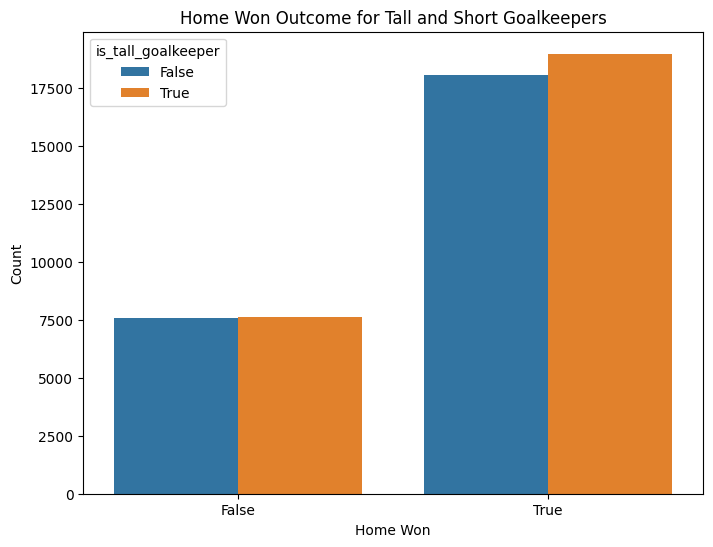

In [ ]:
# Create a count plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.countplot(x='home_won', hue='is_tall_goalkeeper', data=goalkeeper_rows)
plt.title('Home Won Outcome for Tall and Short Goalkeepers')
plt.xlabel('Home Won')
plt.ylabel('Count')
plt.show()

# Unfortunately, here there also is not a clear relationship between the height and the final game outcome.
# All though, it shows a tiny bit that the won games were with a goal keeper with a tall height.
# But not nearly enough to show a relationship.
# There is no clear relationship

# **Research Question 2 Answer**

In Conclusion, it is clear that there is no relationship whatsoever between the goal keepers height and the keepers performance, and not even with the match's outcome.

# **Research Question 3**
____________________
i made a third research question because i felt the first 2 werent enough since i didnt find any relationship and the questions themselves were a bit "meh"
____________________


# **Is there a correlation between a football player being left-footed, having a high market value, and contributing to their team's victory in matches?**

Previous research on the web found the following:-
Are left-footed people better at football?
In the football world, the left-footed player has long been considered aesthetically superior -- more skilled, technically gifted and easier on the eye -- as opposed to those relying on their right, despite the evidence being overwhelmingly anecdotal or unsupported by science


Our hypotheses is that left-footed players have a higher market value due to being more skillful, and hence leading to more won matches.

In [ ]:
#re-initialize the data
random_sample = original_sample

In [ ]:
# Check how many null values we have in the 'foot' column
missing_values = random_sample['foot'].isnull().sum()
missing_values

# We see that we do have some null values

29679

In [ ]:
# Drop all rows with nulls in this column
random_sample = random_sample.dropna(subset=['foot'])

In [ ]:
# Check how many null values we have in the 'foot' column
missing_values = random_sample['foot'].isnull().sum()
missing_values

# We see that we do not have anymore null values

0

In [ ]:
# create the home_won colum again
random_sample['home_won'] = random_sample['home_club_goals'] >= random_sample['away_club_goals']


<ipython-input-46-3d6fd7427df1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_sample['home_won'] = random_sample['home_club_goals'] >= random_sample['away_club_goals']


In [ ]:
# Specify the columns you want to display
columns_to_display = ['player_code', 'foot', 'home_won', 'market_value_in_eur']

# Display a random sample of rows for the specified columns for goalkeepers
display = random_sample.loc[:, columns_to_display].sample(n=5)
print(display)

                     player_code   foot  home_won  market_value_in_eur
589927            sebastian-rudy  right      True            1000000.0
4324652           oleg-slobodyan  right     False             250000.0
2808879              tomas-sivok  right     False             250000.0
2515207  triantafyllos-pasalidis  right     False             500000.0
1196377               kolo-toure  right      True            1750000.0


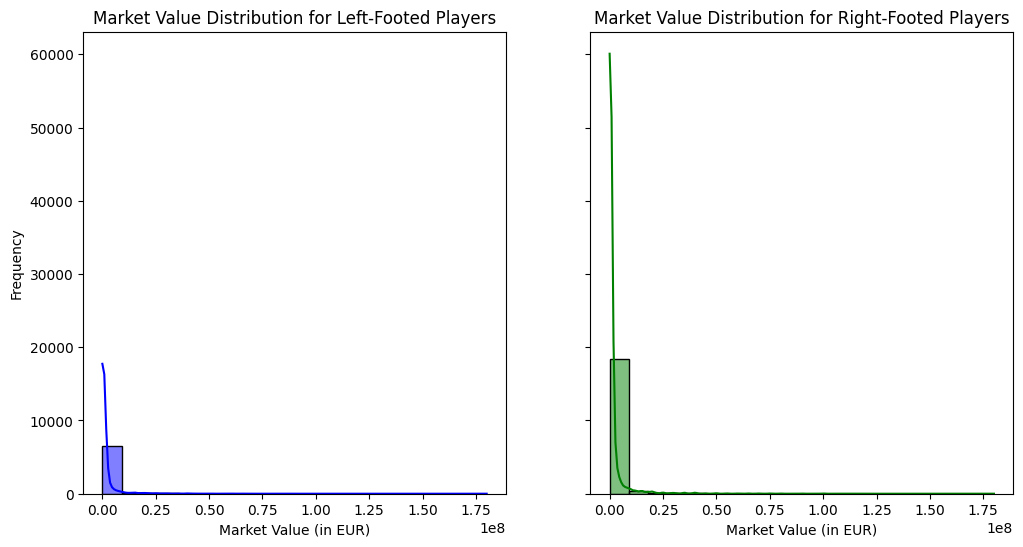

In [ ]:
# Create separate DataFrames for left and right-footed players
left_footed = players[players['foot'] == 'left']
right_footed = players[players['foot'] == 'right']

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot histograms for left-footed players
sns.histplot(left_footed['market_value_in_eur'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Market Value Distribution for Left-Footed Players')
axes[0].set_xlabel('Market Value (in EUR)')
axes[0].set_ylabel('Frequency')

# Plot histograms for right-footed players
sns.histplot(right_footed['market_value_in_eur'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Market Value Distribution for Right-Footed Players')
axes[1].set_xlabel('Market Value (in EUR)')

plt.show()

# We see that both have the exact same market value.
# the only difference is that the right footed players appear more often in frequency.

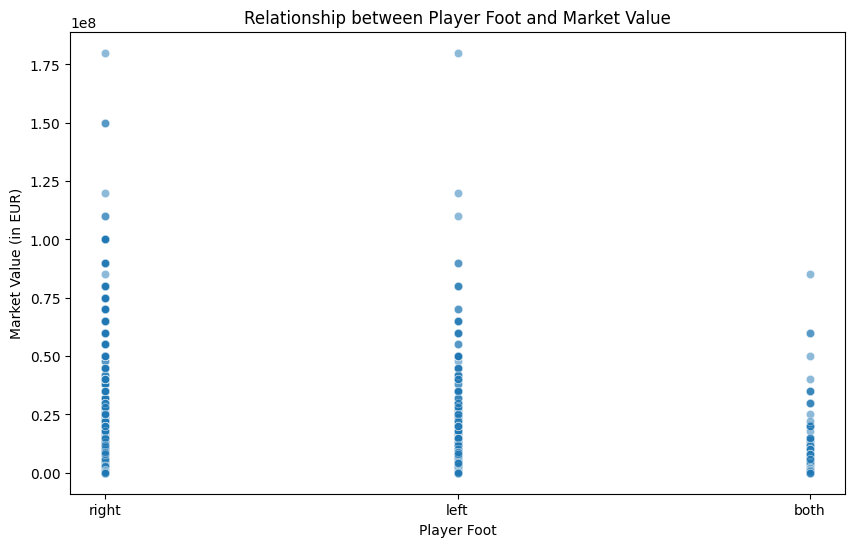

In [ ]:
# Create a scatter plot for foot and market value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='foot', y='market_value_in_eur', data=players, alpha=0.5)
plt.title('Relationship between Player Foot and Market Value')
plt.xlabel('Player Foot')
plt.ylabel('Market Value (in EUR)')
plt.show()

# We see that there is no difference between left footed players and right footed players.
# Allthough, we do see that players that play with both feet, do have a lower market value than both the left and right footed players.
# This is not part of our research question, but it IS a piece if data that we were able to gather from the diagrams and data visualization.

In [ ]:
# From the above plots, we see, AGAIN, that there is no relationship hwatsoever between the player "value" and their "foot"

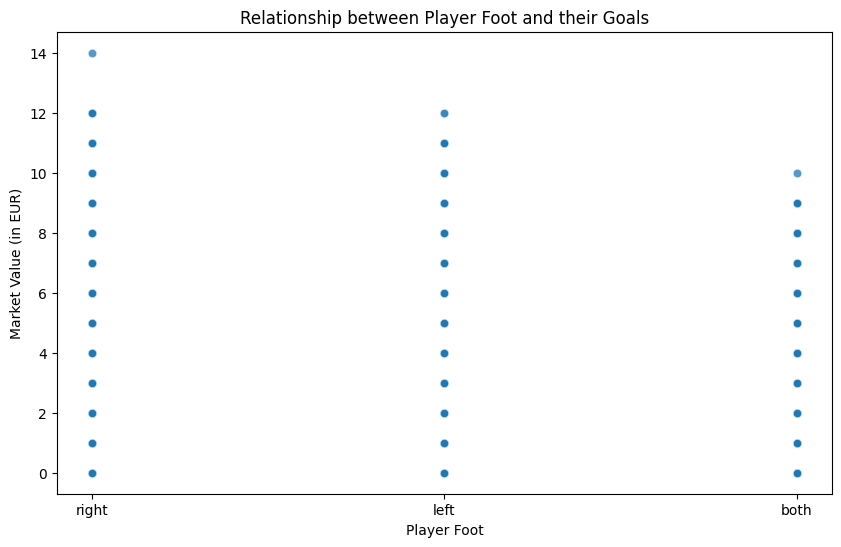

In [ ]:
# Create a scatter plot for foot and home goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='foot', y='home_club_goals', data=random_sample, alpha=0.5)
plt.title('Relationship between Player Foot and their Goals')
plt.xlabel('Player Foot')
plt.ylabel('Market Value (in EUR)')
plt.show()

In [ ]:
# This shows how many players scored how many goals
foot_goal_frequency = random_sample.groupby('foot')['home_club_goals'].value_counts().unstack().fillna(0)

# Display the frequency table
print(foot_goal_frequency)

home_club_goals     0.0       1.0      2.0      3.0      4.0     5.0     6.0   \
foot                                                                            
both              4869.0    6759.0   5147.0   2765.0   1207.0   489.0   191.0   
left             25445.0   36133.0  27312.0  14422.0   6090.0  2530.0   862.0   
right            71610.0  101848.0  76956.0  40218.0  16992.0  6873.0  2515.0   

home_club_goals   7.0    8.0   9.0   10.0  11.0  12.0  14.0  
foot                                                         
both              47.0   19.0   8.0   2.0   0.0   0.0   0.0  
left             229.0   78.0  33.0  20.0  12.0   3.0   0.0  
right            599.0  218.0  88.0  57.0  25.0  10.0   2.0  


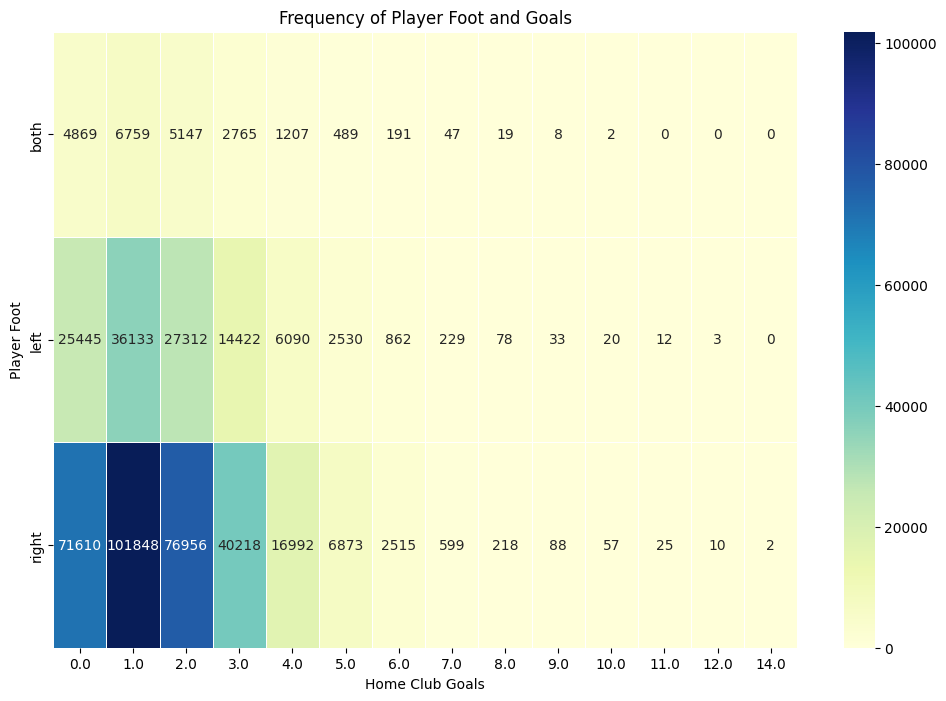

In [ ]:
# This is the exact same previous data but we put it in a diagram
foot_goal_frequency = random_sample.groupby('foot')['home_club_goals'].value_counts().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(foot_goal_frequency, annot=True, fmt="g", cmap="YlGnBu", linewidths=.5)
plt.title('Frequency of Player Foot and Goals')
plt.xlabel('Home Club Goals')
plt.ylabel('Player Foot')
plt.show()
# We simply see that we have more right footed players, which is normal, because in general the amount of right footed players are more.
# But we DO see a tiny difference in the highest goals that the players scored.
# Our assumption was that left-footed players will score more goals, as in they will have more higher goals.
# For example: i mean that left-footed players will have scored 12 goals in a match more often than right-footed players.
# In the diagram, we see that, in fact, the right-footed players are the ones that score more higher goals.
# They have scored twice 14 goals, which lefties have scored 14 goals zero times.
# They have scored 12 goals 10 times, while lefties scored 10 goals only 3 times.
# And this continues a bit.

# It is a pretty visible difference.

# **Research Question 3 Answer**

In Conclusion, it is clear that there is no relationship whatsoever between the players foot and their market value. And the market value is not related to the goals scored either. Our Assumption was that they would be related.

We did see tho, that there was some relationship between the goal keepers foot and the highest goals they scored.
Part of our assumption was that lefties will have more higher goals than righties, as history and knowledge shows that lefties are more skillfull players, but the visualizations and analysis shows that, in fact, righties have scored more higher goals than lefties.

When we look at the research question as a WHOLE tho, we cannot say that our assumption was correct. This is because IN CONCLUSION, lefties showed no relationship between them and their market value. And when it came to a relationship between lefties and them having scored more higher goals, it was the opposite. they had scored less higher goals than righties.

Hence, our assumption and hypothesis was incorrect.

The only useful knowledge that we gained, is that right-footed players scored MORE HIGHER goals than left-footed players!